In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import seaborn as sns
import math
import datetime as dt

In [13]:
#import cleaned data 
cleaned = pd.read_csv('CleanSOSC.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
cleaned

,Unnamed: 0,gvkey,splticrm,datadate,tic,cusip_x,date,NCUSIP,TICKER,PERMNO,COMNAM,cusip_y,NWPERM,PRC,VOL,RET
0,0,1003,NaN,20100131,ANTQ,0003541,2010-01-31,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1003,NaN,20100228,ANTQ,0003541,2010-02-28,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1003,NaN,20100331,ANTQ,0003541,2010-03-31,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1003,NaN,20100430,ANTQ,0003541,2010-04-30,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1003,NaN,20100531,ANTQ,0003541,2010-05-31,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832964,832964,316056,BBB-,20161031,ALLE,G0176J1,2016-10-31,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,71.22,573928.0,-0.000561
832965,832965,316056,BBB-,20161130,ALLE,G0176J1,2016-11-30,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,68.91,1014660.0,0.009522
832966,832966,316056,BBB-,20161231,ALLE,G0176J1,2016-12-31,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,63.84,1601109.0,0.003931
832967,832967,316056,BBB-,20170131,ALLE,G0176J1,2017-01-31,G0176J109,ALLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cleaned.columns

Index(['Unnamed: 0', 'gvkey', 'splticrm', 'datadate', 'tic', 'cusip_x', 'date',
       'NCUSIP', 'TICKER', 'PERMNO', 'COMNAM', 'cusip_y', 'NWPERM', 'PRC',
       'VOL', 'RET'],
      dtype='object')

In [16]:
cleaned = cleaned.dropna(subset=['PRC', 'splticrm'])

In [19]:
binsdict = {
    'D': 1,
    'SD': 2,
    'RD': 3,
    'C': 4,
    'CC': 5,
    'CCC-': 6,
    'CCC': 7,
    'CCC+': 8,
    'B-': 9,
    'B': 10,
    'B+' : 11,
    'BB-': 12,
    'BB': 13,
    'BB+': 14,
    'BBB-': 15,
    'BBB': 16,
    'BBB+' : 17,
    'A-': 18,
    'A': 19,
    'A+': 20,
    'AA-': 21,
    'AA': 22,
    'AA+': 23,
    'AAA': 24
}


In [20]:
#create numerical credit rating
func = lambda x: binsdict[x]
cleaned['num_cr'] = cleaned['splticrm'].apply(func)

<ipython-input-20-f7a6904ae199>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['num_cr'] = cleaned['splticrm'].apply(func)


In [23]:
#create returns
#note returns are not multiplied by 100 so kept in decimal format of percent
cleaned['our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: x.pct_change())
cleaned['log_our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: np.log(x).pct_change())

<ipython-input-23-e5cc2aad3e7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: x.pct_change())
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-23-e5cc2aad3e7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['log_our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: np.log(x).pct_change())


In [24]:
#remove first data row as that cannot have percent change
cleaned = cleaned.dropna(subset=['our_ret','log_our_ret'])

In [26]:
#OLS regressions 
model=sm.OLS(cleaned['our_ret'], cleaned['num_cr'])
logmodel=sm.OLS(cleaned['log_our_ret'], cleaned['num_cr'])
result=model.fit()
logresult=logmodel.fit()
print(result.summary())
print('\n\n\n\n\n\n')
print(logresult.summary())

                                 OLS Regression Results                                
Dep. Variable:                our_ret   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              30.57
Date:                Thu, 03 Jun 2021   Prob (F-statistic):                    3.25e-08
Time:                        10:53:11   Log-Likelihood:                         -43327.
No. Observations:               41244   AIC:                                  8.666e+04
Df Residuals:                   41243   BIC:                                  8.666e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
ind_df = pd.DataFrame(index=cleaned['date'].unique())
diff_df = pd.DataFrame(index=cleaned['date'].unique())

In [29]:
for cr in np.sort(cleaned['num_cr'].unique()):
    ind_df[str(cr)+'_index'] = cleaned[cleaned['num_cr'] == cr].groupby(['date']).apply(lambda x: x[x['num_cr'] == cr]['PRC'].sum())

Lots of sparsity on lower credit ratings.  We reasonably should have expected this but it is annoying nonetheless.  As a result, we are going to plot 24 with 10 for pretty visuals.

In [30]:
ind_df

,1_index,2_index,5_index,6_index,7_index,8_index,9_index,10_index,11_index,12_index,...,15_index,16_index,17_index,18_index,19_index,20_index,21_index,22_index,23_index,24_index
2010-06-30,16.0300,NaN,NaN,2.21,6.0700,109.6000,289.25000,1210.88430,1657.78500,2659.71050,...,5143.76750,7654.14249,4361.05999,3643.44001,3627.90250,2447.38999,1250.57000,947.50999,129.40000,247.9750
2010-10-31,12.6500,NaN,NaN,1.68,2.5600,71.4675,145.65160,894.70050,1417.81250,2106.40490,...,4896.31249,6274.32497,3985.96240,3574.54150,3155.79399,2251.64450,1015.13750,788.66000,120.27000,215.0850
2011-01-31,13.7600,NaN,NaN,NaN,NaN,76.8800,153.41970,1237.67560,1678.84900,2597.52500,...,5545.15011,7279.42246,4909.27000,3888.93000,3630.94510,2410.85951,1266.04000,897.74000,140.76000,237.2575
2011-02-28,13.3700,NaN,NaN,NaN,NaN,88.9700,168.64320,1421.10000,1728.66010,2897.12010,...,5913.36501,7474.03503,5202.27000,3835.31801,4089.75000,1893.06997,1333.04000,969.94000,156.40000,249.6800
2011-03-31,11.9800,NaN,NaN,NaN,NaN,72.7200,213.91000,1536.94000,1713.68500,2729.97500,...,6050.05500,7748.79000,5199.06999,4011.74001,4118.13000,2615.78999,1370.11000,875.68000,151.61000,260.6850
2011-04-30,10.8000,NaN,NaN,NaN,NaN,58.6200,182.55000,1677.07000,1944.50000,2841.28000,...,5816.10500,8168.64999,5449.62000,4208.08000,4240.37499,2710.61990,1476.28000,831.57000,154.13001,275.4900
2011-07-31,17.7700,NaN,NaN,NaN,5.0600,46.8000,235.71000,1371.52160,1888.88500,2584.11000,...,5816.65000,8100.38502,5769.46500,4095.04001,4252.70000,2520.41999,1523.79000,824.26001,170.71001,280.4600
2011-10-31,8.9600,NaN,1.64,NaN,1.9300,29.8800,164.16000,1030.84300,1562.33000,2237.19500,...,5032.05000,7617.37000,4703.16000,4207.12000,3765.69001,2283.17500,1465.99000,681.98500,170.41001,257.4300
2011-11-30,6.4400,NaN,NaN,1.22,3.6000,10.4300,171.38000,877.02240,1393.45500,2109.35500,...,4668.97500,6838.83999,4436.06000,4097.20001,3226.20000,2230.62499,1182.00000,633.72999,164.75999,244.4700
2011-12-31,6.7700,NaN,NaN,1.44,3.5500,17.9600,218.37000,976.35000,1478.04000,2392.73000,...,5246.54500,7806.70001,5032.57750,4655.23997,3391.19000,2374.64999,1352.40000,590.51000,188.02000,262.6600


In [31]:
for col in ind_df.columns:
    diff_df[col] = ind_df[col].apply(lambda x: x-ind_df.iloc[0][col])

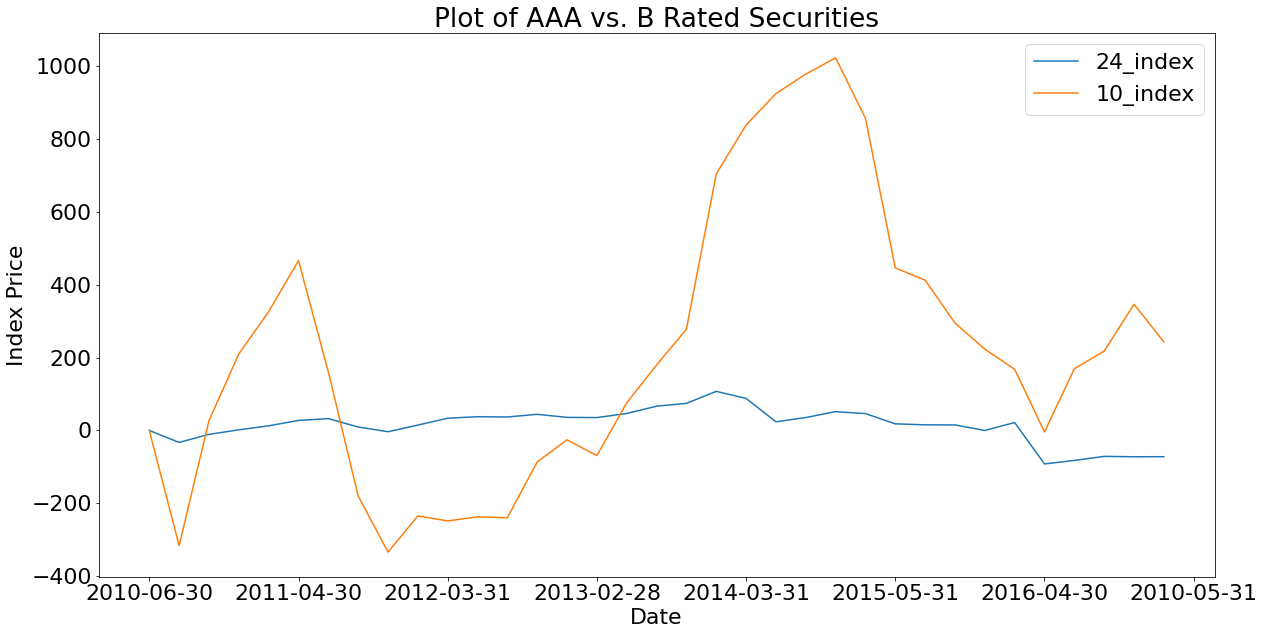

In [32]:
diff_df[['24_index', '10_index']].plot(figsize=(20,10))
plt.title('Plot of AAA vs. B Rated Securities')
plt.ylabel('Index Price')
plt.xlabel('Date')
plt.savefig('LinePlot.png', dpi=500)

By the above plot we see seemingly unintuitive results.  But, considering the intuition of the Sharpe ratio these results make sense from a theoretical standpoint.  Our assumption was that $returns$ of higher credit rated stocks would outperform those of lower credit rated stocks, but this assumption inherently neglects the relative risk of these assets.  As such, we must compare the risk adjusted returns, given to us by the Sharpe ratio, rather than the absolute returns.  We calculate Sharpe for each index below.

In [39]:
sharpe_df = pd.DataFrame(index=range(1,25), columns= ['Sharpe'])

i=0
for col in ind_df.columns:
    num = int(col.split('_')[0])
    sharpe_df['Sharpe'][num] = ret_df[col+'_ret'].mean() / ret_df[col+'_ret'].std()
    i+=1

In [40]:
sharpe_df

,Sharpe
1,0.157682
2,0.424713
3,NaN
4,NaN
5,0.215428
6,0.091515
7,0.149145
8,0.270401
9,0.012638
10,0.104216


Consider only 4: since these are well defined.

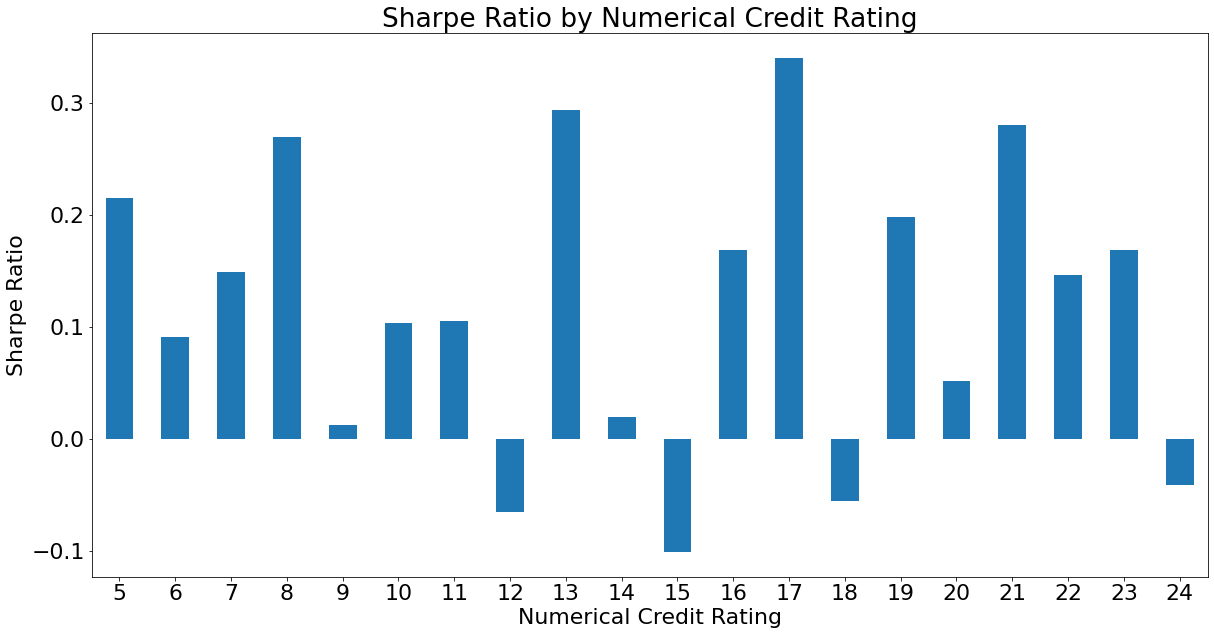

In [41]:
sharpe_df[4:].plot.bar(figsize= (20,10), rot=0, legend=False)
plt.title('Sharpe Ratio by Numerical Credit Rating')
plt.xlabel('Numerical Credit Rating')
plt.ylabel('Sharpe Ratio')
plt.savefig('SharpeBars.png', dpi=500)

We see similarly bizarre results. 

Now, consider the distribution of returns.

In [34]:
ret_df = pd.DataFrame(index=ind_df.index)
for col in ind_df:
    ret_df[col+'_ret'] = ind_df[col].pct_change(1)

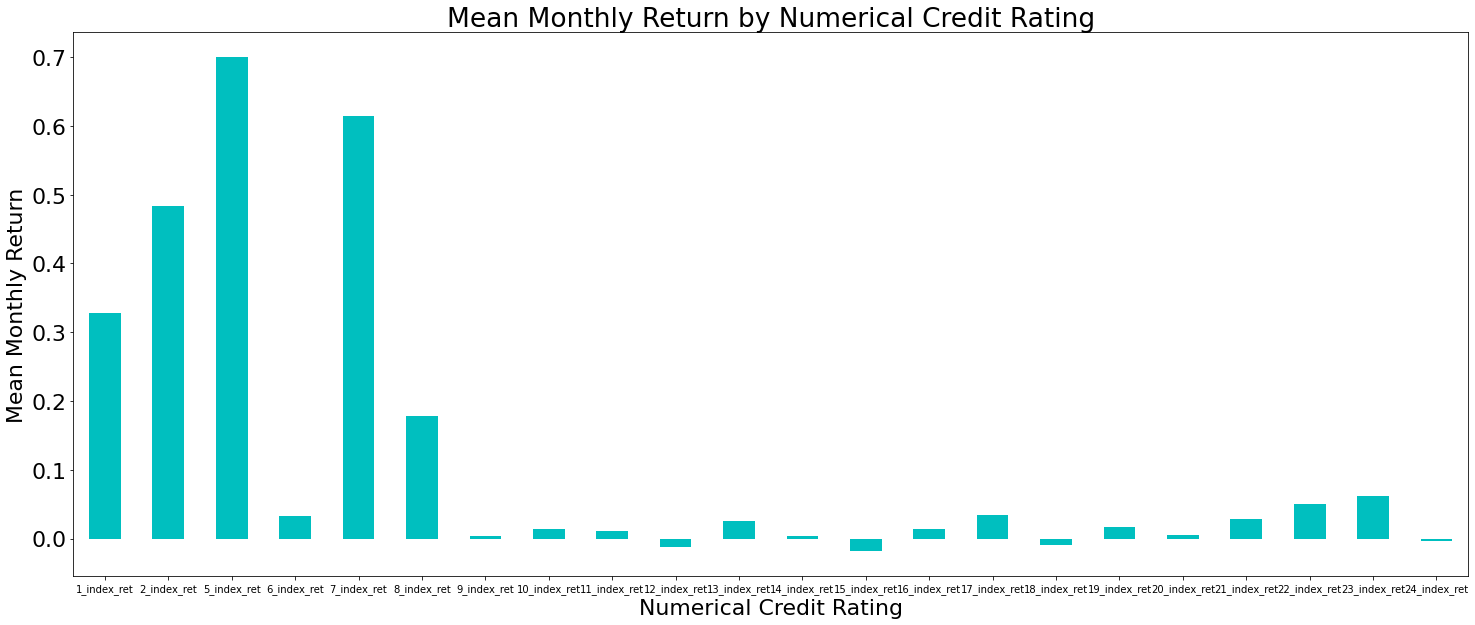

In [38]:
ret_df.mean().plot.bar(figsize= (25,10), rot=0, legend=False, color='c')
plt.title('Mean Monthly Return by Numerical Credit Rating')
plt.xlabel('Numerical Credit Rating')
plt.xticks(fontsize=10)
plt.ylabel('Mean Monthly Return')
plt.savefig('MeanRetBars.png', dpi=500)

In [36]:
ret_df

,1_index_ret,2_index_ret,5_index_ret,6_index_ret,7_index_ret,8_index_ret,9_index_ret,10_index_ret,11_index_ret,12_index_ret,...,15_index_ret,16_index_ret,17_index_ret,18_index_ret,19_index_ret,20_index_ret,21_index_ret,22_index_ret,23_index_ret,24_index_ret
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-31,-0.210855,NaN,NaN,-0.239819,-0.578254,-0.347924,-0.496451,-0.261118,-0.144755,-0.208032,...,-0.048108,-0.180271,-0.086011,-0.018910,-0.130133,-0.079981,-0.188260,-0.167650,-0.070556,-0.132634
2011-01-31,0.087747,NaN,NaN,0.000000,0.000000,0.075734,0.053333,0.383341,0.184112,0.233156,...,0.132516,0.160192,0.231640,0.087952,0.150565,0.070711,0.247161,0.138311,0.170367,0.103087
2011-02-28,-0.028343,NaN,NaN,0.000000,0.000000,0.157258,0.099228,0.148201,0.029670,0.115339,...,0.066403,0.026735,0.059683,-0.013786,0.126360,-0.214774,0.052921,0.080424,0.111111,0.052359
2011-03-31,-0.103964,NaN,NaN,0.000000,0.000000,-0.182646,0.268418,0.081514,-0.008663,-0.057694,...,0.023115,0.036761,-0.000615,0.045999,0.006939,0.381771,0.027809,-0.097181,-0.030627,0.044076
2011-04-30,-0.098497,NaN,NaN,0.000000,0.000000,-0.193894,-0.146604,0.091175,0.134689,0.040771,...,-0.038669,0.054184,0.048191,0.048941,0.029685,0.036253,0.077490,-0.050372,0.016622,0.056793
2011-07-31,0.645370,NaN,NaN,0.000000,0.976563,-0.201638,0.291208,-0.182192,-0.028601,-0.090512,...,0.000094,-0.008357,0.058691,-0.026863,0.002907,-0.070168,0.032182,-0.008791,0.107572,0.018041
2011-10-31,-0.495779,NaN,NaN,0.000000,-0.618577,-0.361538,-0.303551,-0.248395,-0.172882,-0.134249,...,-0.134889,-0.059629,-0.184819,0.027370,-0.114518,-0.094129,-0.037932,-0.172609,-0.001757,-0.082115
2011-11-30,-0.281250,NaN,0.000000,-0.273810,0.865285,-0.650937,0.043981,-0.149218,-0.108092,-0.057143,...,-0.072153,-0.102205,-0.056792,-0.026127,-0.143265,-0.023016,-0.193719,-0.070757,-0.033155,-0.050344
2011-12-31,0.051242,NaN,0.000000,0.180328,-0.013889,0.721956,0.274186,0.113255,0.060702,0.134342,...,0.123704,0.141524,0.134470,0.136200,0.051141,0.064567,0.144162,-0.068199,0.141175,0.074406


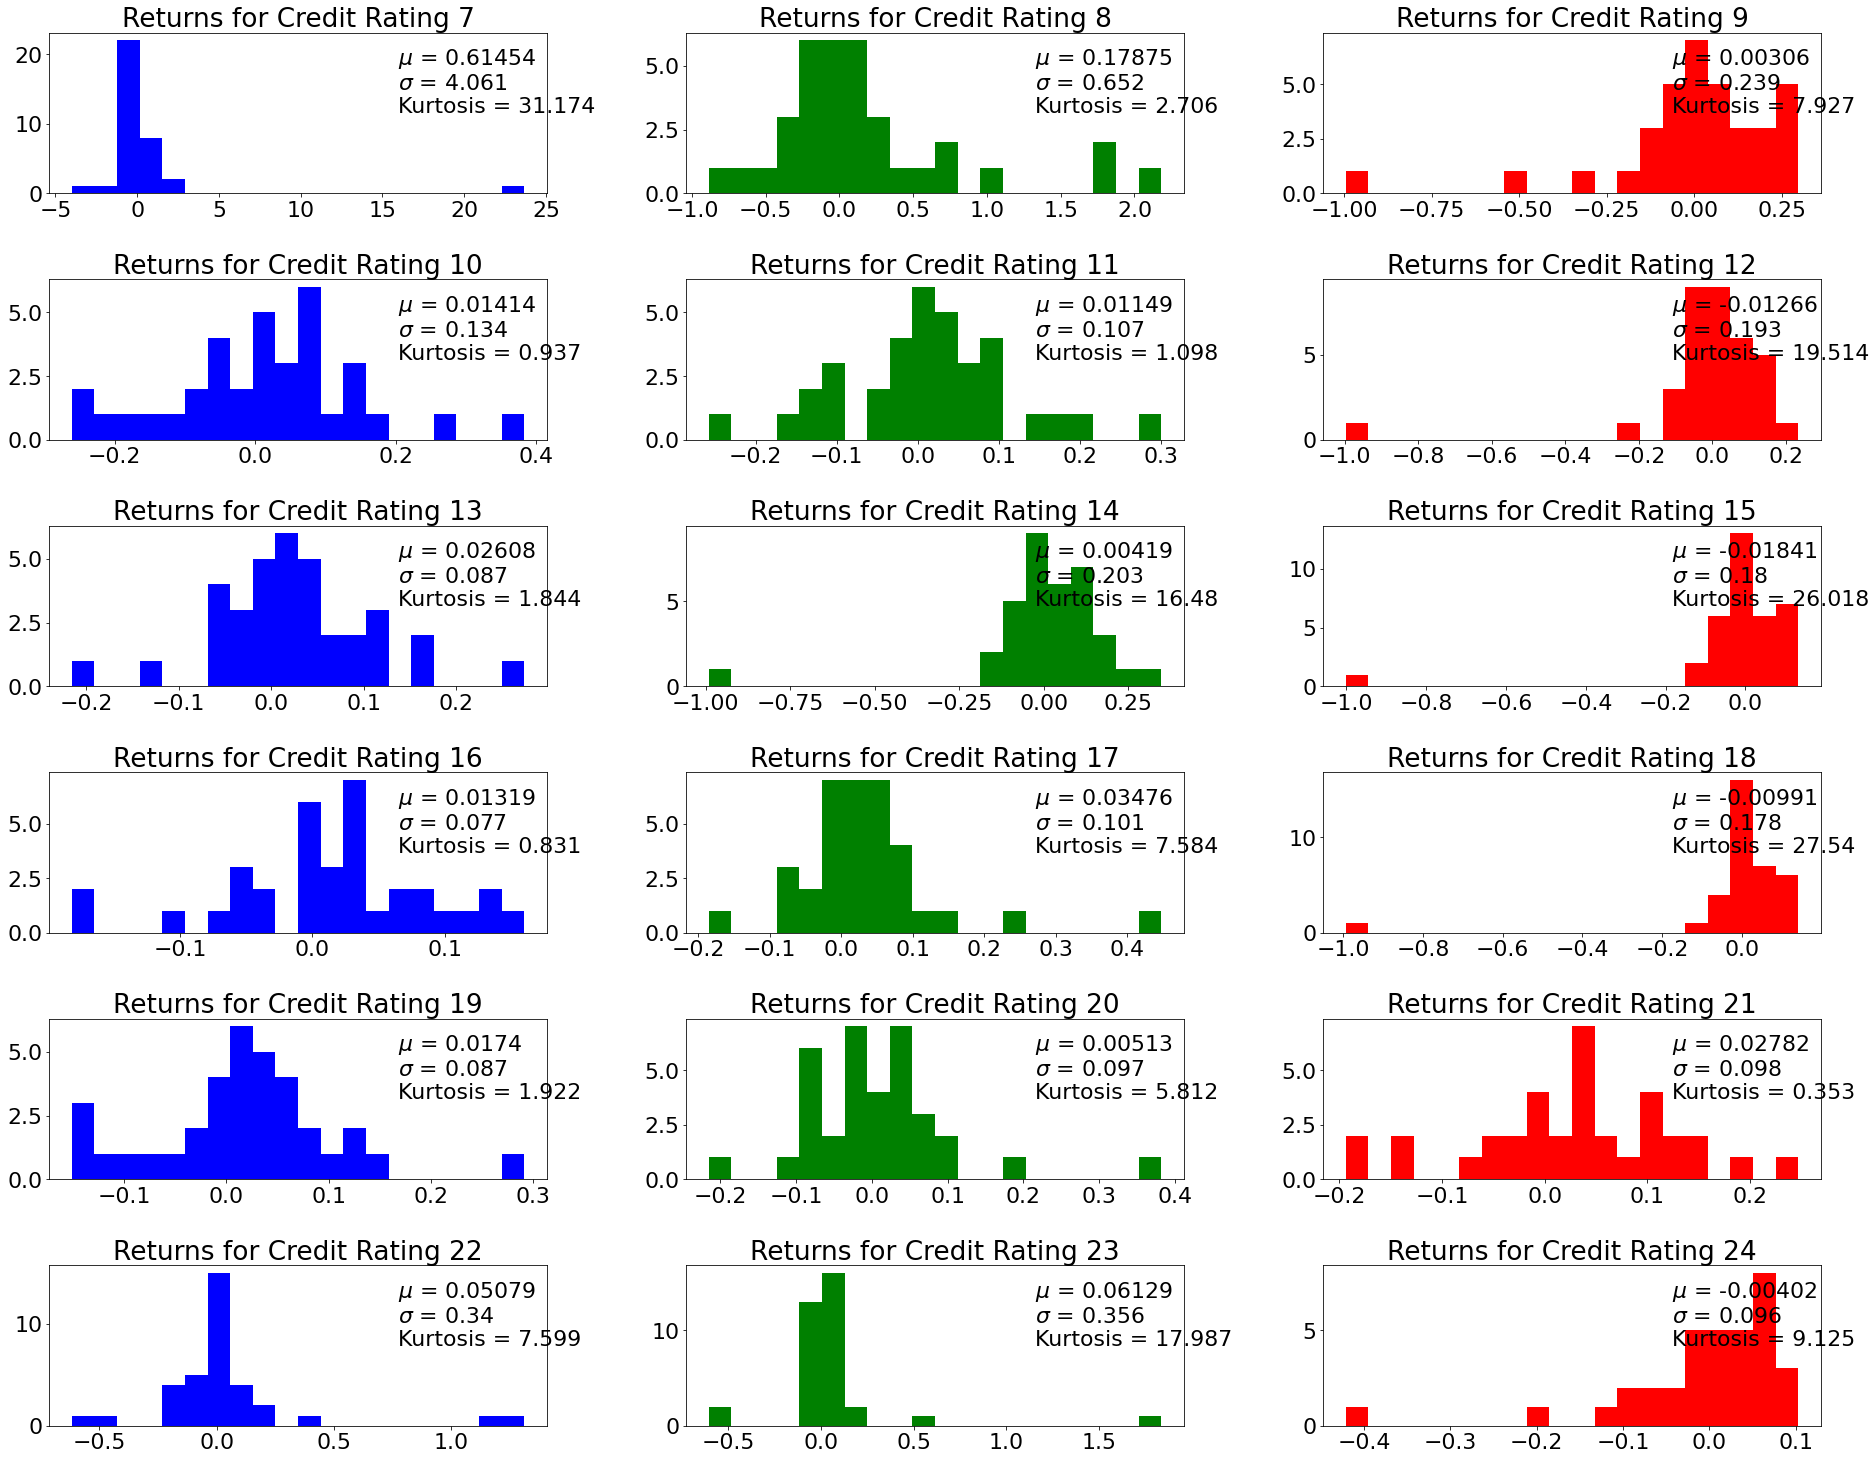

In [45]:
#plot 7:
fig, axs = plt.subplots(6, 3, figsize=(27,21))

j=7
colors = ['b', 'g', 'r']

for row in range(0,6):
    for col in range(0,3):
        axs[row][col].hist(x=ret_df[str(j) + '_index_ret'], bins=20, color=colors[col])
        axs[row][col].title.set_text('Returns for Credit Rating ' + str(j))
        axs[row][col].annotate('$\mu$ = ' + str(round(np.mean(ret_df[str(j) + '_index_ret']),5)) + '\n$\sigma$ = ' +
                str(round(np.std(ret_df[str(j) + '_index_ret']),3)) +\
                           '\nKurtosis = ' + str(round(ret_df[str(j) + '_index_ret'].kurtosis(),3)), xy=(.7, .5), xycoords='axes fraction')
        j+=1

fig.tight_layout(pad=1.5)
plt.savefig('RetDist.png', dpi=500)
